In [1]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

In [2]:
# Usamos pandas para abrir nuestro dataset
df = pd.read_csv('AmesHousing.csv')

# Seleccionar solo las columnas numéricas para facilitar los calculos
numeric_df = df.select_dtypes(include=[np.number])


# Veamos un par de las primeras filas
print(numeric_df.head())


   Order        PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0      1  526301100           20         141.0     31770             6   
1      2  526350040           20          80.0     11622             5   
2      3  526351010           20          81.0     14267             6   
3      4  526353030           20          93.0     11160             7   
4      5  527105010           60          74.0     13830             5   

   Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  ...  Wood Deck SF  \
0             5        1960            1960         112.0  ...           210   
1             6        1961            1961           0.0  ...           140   
2             6        1958            1958         108.0  ...           393   
3             5        1968            1968           0.0  ...             0   
4             5        1997            1998           0.0  ...           212   

   Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  \
0

Vamos a verificar si hay datos que pudieran faltar o ser incorrectos en nuestro dataset

In [3]:
# Veamos si hay valores nulos
print("Datos faltantes por columna:")
print(numeric_df.isnull().sum())
# Veamos si hay valores infinitos
print("\nDatos finitos por columna:")
print(np.isfinite(numeric_df).sum())

# Eliminar filas con datos faltantes
numeric_df = numeric_df.dropna()

Datos faltantes por columna:
Order                0
PID                  0
MS SubClass          0
Lot Frontage       490
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        23
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      159
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

Datos finitos por columna:
Order              2930
PID      

In [4]:
# Verificar nuevamente después de eliminar filas con datos faltantes
print("\nDatos faltantes después de eliminar filas con NaN:")
print(numeric_df.isnull().sum())

print("\nDatos finitos después de eliminar filas con NaN:")
print(np.isfinite(numeric_df).sum())


Datos faltantes después de eliminar filas con NaN:
Order              0
PID                0
MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
SalePrice          0
dtype: int64

Datos finitos después de eliminar filas con NaN:
Order              2274
PID                2274
MS SubClass       

Ahora ya tenemos mejor ordenados los datos quitando los valores nulos y los valores infinitos

Vemos que son muchos datos (caracteristicas) siendo estas 82 asi que la reduciremos caluclando la correlacion de cada caracteristica con el SalePrice es decir el precio de la casa (objetivo)

In [5]:
correlation_matrix = numeric_df.corr()
correlation_with_saleprice = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Mostrar las 10 características más correlacionadas con SalePrice
print(correlation_with_saleprice.head(10))

SalePrice        1.000000
Overall Qual     0.803944
Gr Liv Area      0.714171
Garage Cars      0.661288
Garage Area      0.647847
Total Bsmt SF    0.645715
1st Flr SF       0.638762
Full Bath        0.559935
Year Built       0.559622
Garage Yr Blt    0.541860
Name: SalePrice, dtype: float64


Muy bien ahora tenermos los datos mas importantes para el SalePrice estos son:

- Overall Qual (Calidad Global de la Construcción) teniendo una correlacion de 0.799262 la cual es muy alta
- Gr Liv Area (Área Habitable en Planta) 0.706780 de correlación igual muy alta
- Garage Cars (Número de Coches que Caben en el Garaje) 0.647877 de correlación
- Garage Area (Área del Garaje) 0.640401 de correlación
- Total Bsmt SF (Área Total del Sótano) 0.632280 de correlación
- 1st Flr SF (Área del Primer Piso) 0.621676 de correlación
- Year Built (Año de Construcción) 0.558426 de correlación
- Full Bath (Número de Baños Completos) 0.545604 de correlación
- Year Remod/Add (Año de Remodelación/Adición) 0.532974 de correlación

Teniendo estos datos ya sabemos que caracteristicas utilizar asi evitando usar las 82 caracteristicas donde algunas no tendrian mucho impacto

In [6]:
# Asignaremos las caracteristicas a x_train y la variable objetivo SalePrice a y_train
x_train = numeric_df[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF','Full Bath', 'Year Built', 'Year Remod/Add']]
y_train = numeric_df['SalePrice']

# Convertir a NumPy arrays para facilitar el manejo
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

In [7]:
# Veamos la dimension de nuestros datos

print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (2274, 9)
The shape of y_train is:  (2274,)
Number of training examples (m): 2274


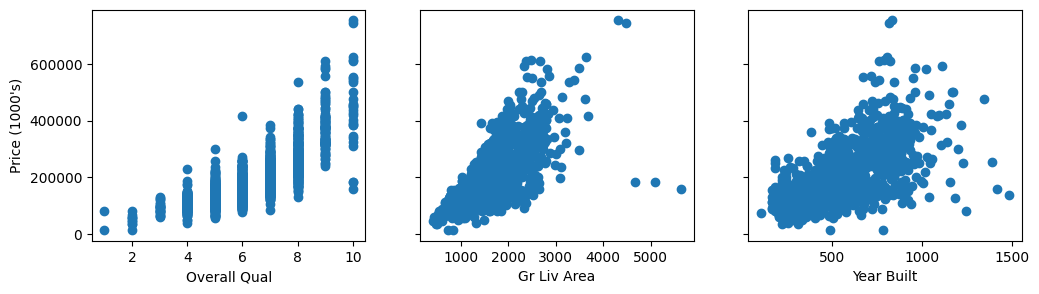

In [8]:

# Vamos a ver estos 3 features donde veremos estos 3 graficos
# Gráfico de dispersión para 'Overall Qual' vs 'SalePrice'
# Gráfico de dispersión para 'Gr Liv Area' vs 'SalePrice'
# Gráfico de dispersión para 'Year Built' vs 'SalePrice'

X_features = ['Overall Qual', 'Gr Liv Area', 'Year Built']

# Visualicemos los datos con matplotlib
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

Veamos un poco que nos dicen estos graficos:

Gráfico 1: Overall Qual vs SalePrice: Este gráfico muestra la relación entre la calidad general de las viviendas (Overall Qual) y el precio de venta (SalePrice).
- Podemos ver que claramente miestras mejor calidad mas alto es el valor de la casa siendo entre 8-10 donde los valores de las casas llegan mucho mas alto

Gráfico 2: Gr Liv Area vs SalePrice: Este gráfico muestra la relación entre el área habitable en pies cuadrados (Gr Liv Area) y el precio de venta (SalePrice).
- La mayoria de datos sigue un cierto patron donde mientras mas grande es el area mayor es el precio de la vivienda, podemos ver que la mayoria de casas tienen 1,000 y 2,500 pies cuadrados, con precios de venta que varían entre 100,000 y 400,000.

Gráfico 3: Year Built vs SalePrice: Este gráfico muestra la relación entre el año de construcción de las viviendas (Year Built) y el precio de venta (SalePrice).
- Las viviendas más nuevas tienden a tener precios de venta más altos, aunque hay una variabilidad considerable entre los precios de las viviendas.


<a name="toc_15456_4"></a>
# Compute Cost With Multiple Variables

Ahora se implementara la ecuación de la función de costos con múltiples variables $J(\mathbf{w},b)$ la cual es:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
donde:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


$\mathbf{w}$ y $\mathbf{x}^{(i)}$ son vectores en lugar de escalares que admiten múltiples características.

In [9]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

<a name="toc_15456_5"></a>
# Gradient Descent With Multiple Variables
Descenso de gradiente para múltiples variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

donde, n es el número de características, los parámetros $w_j$, $b$, se actualizan simultáneamente y donde

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m es el número de ejemplos de entrenamiento en el conjunto de datos

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ es la predicción del modelo, mientras que $y^{(i)}$ es el valor objetivo


# Compute Gradient with Multiple Variables
A continuación se muestra una implementación para calcular las ecuaciones (6) y (7). Hay muchas maneras de implementar esto. En esta versión hay una
 - $\frac{\partial J(\mathbf{w},b)}{\partial b}$ para el ejemplo se puede calcular directamente y acumular
 - en un segundo bucle sobre las n características:
    - $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ se calcula para cada $w_j$.

In [10]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

<a name="toc_15456_5.2"></a>
## Gradient Descent With Multiple Variables
La siguiente celda implementa la ecuación (5) anterior.

In [11]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [12]:
# Mostrar primeros 5 ejemplos de x_train y y_train
print('First 5 examples of x_train:')
print(x_train[:5])
print('First 5 examples of y_train:')
print(y_train[:5])

First 5 examples of x_train:
[[6.000e+00 1.656e+03 5.280e+02 2.000e+00 1.080e+03 1.656e+03 1.000e+00
  1.960e+03 1.960e+03]
 [5.000e+00 8.960e+02 7.300e+02 1.000e+00 8.820e+02 8.960e+02 1.000e+00
  1.961e+03 1.961e+03]
 [6.000e+00 1.329e+03 3.120e+02 1.000e+00 1.329e+03 1.329e+03 1.000e+00
  1.958e+03 1.958e+03]
 [7.000e+00 2.110e+03 5.220e+02 2.000e+00 2.110e+03 2.110e+03 2.000e+00
  1.968e+03 1.968e+03]
 [5.000e+00 1.629e+03 4.820e+02 2.000e+00 9.280e+02 9.280e+02 2.000e+00
  1.997e+03 1.998e+03]]
First 5 examples of y_train:
[215000 105000 172000 244000 189900]


In [13]:

initial_w = np.zeros(x_train.shape[1])
print(f"initial_w: {initial_w}")
initial_b = 0
# Se debe ajustar el valor de alpha para que el modelo converja ya que si es muy grande, el modelo diverge
# Con 5.0e-7 nuestro modelo no converge es necesario ajustar el valor de alpha a un valor más pequeño como 1.0e-7 
alpha = 1.0e-7 
iterations = 1000
# Entrenar el modelo
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")



initial_w: [0. 0. 0. 0. 0. 0. 0. 0. 0.]
Iteration    0: Cost 3800945429.42   
Iteration  100: Cost 1222100095.26   
Iteration  200: Cost 1182047625.89   
Iteration  300: Cost 1161540452.73   
Iteration  400: Cost 1149049705.43   
Iteration  500: Cost 1141312879.28   
Iteration  600: Cost 1136482443.50   
Iteration  700: Cost 1133439628.00   
Iteration  800: Cost 1131499852.02   
Iteration  900: Cost 1130242610.34   
b,w found by gradient descent: -0.03,[  2.96901317  72.67422576 103.65730482   0.64890477  56.68511243
   0.77833007   0.39146011   0.21213964 -19.20144577] 


In [14]:
# Ahora vamos a predecir los valores de y_train y compararlos con los valores reales
m,_ = x_train.shape
for i in range(m):
    # print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")
    print(f"predicción: {np.dot(x_train[i], w_final) + b_final:0.2f}, valor real: {y_train[i]}")

predicción: 200388.84, valor real: 215000
predicción: 154257.42, valor real: 105000
predicción: 168131.80, valor real: 172000
predicción: 291351.47, valor real: 244000
predicción: 183751.26, valor real: 189900
predicción: 180578.77, valor real: 195500
predicción: 196480.95, valor real: 213500
predicción: 181225.92, valor real: 191500
predicción: 234258.66, valor real: 236500
predicción: 196129.17, valor real: 189000
predicción: 171884.64, valor real: 175900
predicción: 154622.95, valor real: 180400
predicción: 186874.84, valor real: 171500
predicción: 382311.66, valor real: 538000
predicción: 172800.85, valor real: 164000
predicción: 289846.23, valor real: 394432
predicción: 116867.27, valor real: 141000
predicción: 253771.25, valor real: 210000
predicción: 259048.76, valor real: 190000
predicción: 163118.27, valor real: 170000
predicción: 131582.10, valor real: 142000
predicción: 131806.11, valor real: 126000
predicción: 192880.74, valor real: 184000
predicción: 89440.73, valor real: 

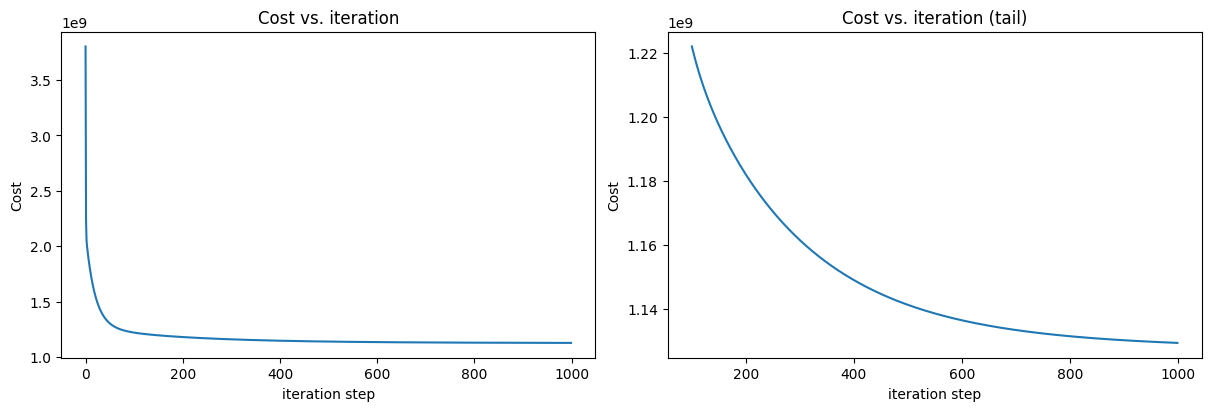

In [15]:
# Ahora grafiquemos el costo vs. el número de iteraciones
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

Vemos que el costo disminuye con el número de iteraciones, lo que indica que el modelo está aprendiendo y mejorando
